## Martin Dionne

# 1. Regressive Tennis T-Test

Use a linear regression and statsmodels to run a t-test on whether Federer scores more points than his opponents in the `tennis.csv` dataset.

Give a one-paragraph interpretation of the coefficient, and the meaning of the p-value. 

Also answer the following: should your regression include a constant term? Why or why not? How would it change the interpretation of your coefficient and p-value?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv('data/tennis.csv')
sub = df[['player1 total points won','player2 total points won']]
sub = sub.dropna()

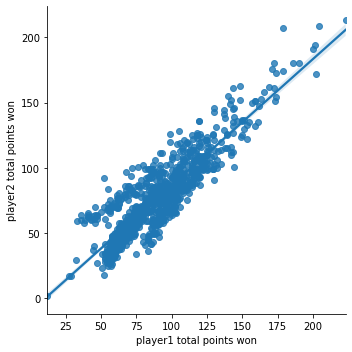

In [4]:
sns.lmplot(y='player2 total points won', x='player1 total points won', data=df, order=1)

In [5]:
y = sub['player2 total points won']
x = sub['player1 total points won']
#est = sm.OLS(y, sm.add_constant(x)).fit(cov_type='HC2')
est = sm.OLS(y, x).fit(cov_type='HC2')
est.summary()

# p value for the player1 total points won is greather than 0.05 so when Federer score 1 point player2 score 0.96 point (less points)
# the standard error being very small and F-stat being high also indicate a significant result
# adding a constant term reduce R-squared significantly and intuively at the beginning the intercept should be at the origin

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     player2 total points won   R-squared (uncentered):                   0.969
Model:                                  OLS   Adj. R-squared (uncentered):              0.969
Method:                       Least Squares   F-statistic:                          2.963e+04
Date:                      Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                              19:59:26   Log-Likelihood:                         -4173.8
No. Observations:                      1027   AIC:                                      8350.
Df Residuals:                          1026   BIC:                                      8355.
Df Model:                                 1                                                  
Covariance Type:                        HC2                                                  
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
player1 total points won     0.8618      0.005    172.127      0.000       0.852       0.872
==============================================================================
Omnibus:                       70.330   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.878
Skew:                           0.698   Prob(JB):                     6.11e-19
Kurtosis:                       3.093   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

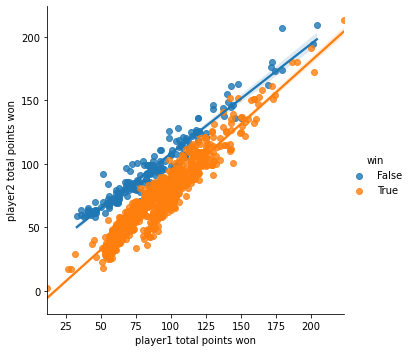

In [6]:
# if we plot different regression for wins and loses we can notice a clear patern
# which also explain part of the data's shape
sns.lmplot(y='player2 total points won', x='player1 total points won', data=df, hue='win', order=1)

# 2. College admissions

Using the `college.csv` dataset, answer the following:

1. Is the relation between `Top10perc` and `Top25perc` best fit using a model with only one variable, or one variable and a polynomial of degree 2? Is a constant term useful? How would you select for the best of these model specifications?

2. Do private schools see more admissions overall? T-test this using a linear regression. Hint: use a binary explanatory variable for `Private`. Explain your model specification choices.


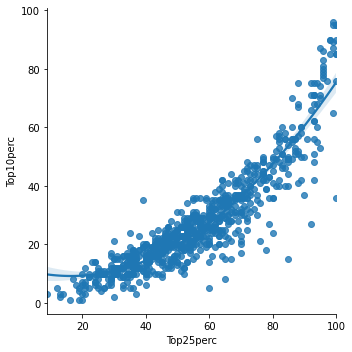

In [9]:
# 1. Is the relation between Top10perc and Top25perc best fit
df = pd.read_csv('data/college.csv')

#plt.scatter(df.Top25perc, df.Top10perc)
sns.lmplot(x="Top25perc", y="Top10perc", data=df, order=2)

# logicaly the intersect should be 0,0 (0 Top25perc should equal to 0 Top10perc) and the data will 
# fit better with a constant and a polynomial of degree 2 will fit the data better

In [20]:
y = df['Top10perc']
x = df[['Top25perc']]
x['Top25perc'] = df['Top25perc'] ** 2

est = sm.OLS(y,x).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Top10perc   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              6995.
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        20:29:11   Log-Likelihood:                         -2600.9
No. Observations:                 777   AIC:                                      5206.
Df Residuals:                     775   BIC:                                      5215.
Df Model:                           2                                                  
Covariance Type:                  HC2                                                  
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Top25perc       0.0974      0.020      4.782      0.000       0.057       0.137
Top25perc_2     0.0062      0.000     18.142      0.000       0.006       0.007
==============================================================================
Omnibus:                      149.322   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              749.525
Skew:                          -0.773   Prob(JB):                    1.75e-163
Kurtosis:                       7.557   Cond. No.                         273.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [26]:
# 2. Do private schools see more admissions overall?
df.Private = df.Private.replace('Yes', 1).replace('No', 0)
x = df.Private
y = df.Accept
#df.Private.unique()
est = sm.OLS(y, sm.add_constant(x)).fit(cov_type='HC2')
#est = sm.OLS(y, x).fit(cov_type='HC2')
est.summary()
# No, Private schools see 3919 (+- 239) less Acceptance


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Accept   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     113.2
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           9.15e-25
Time:                        20:35:57   Log-Likelihood:                -7066.5
No. Observations:                 777   AIC:                         1.414e+04
Df Residuals:                     775   BIC:                         1.415e+04
Df Model:                           1                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3919.2877    238.820     16.411      0.000    3451.210    4387.366
Private    -2613.5851    245.672    -10.639      0.000   -3095.093   -2132.077
==============================================================================
Omnibus:                      603.909   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15927.055
Skew:                           3.268   Prob(JB):                         0.00
Kurtosis:                      24.195   Cond. No.                         3.60
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

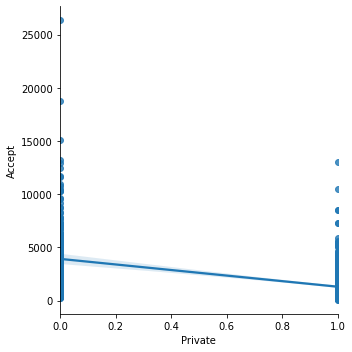

In [27]:
sns.lmplot(x="Private", y="Accept", data=df, order=1)

# 3. Auto prediction

Using the `auto.csv` dataset, perform a simple linear regression with `mpg` as the response variable and horsepower as the predictor. Answer the following:

 i. Is there a relationship between the predictor and the response?
 
 ii. How strong is the relationship between the predictor and the response?
 
 iii. Is the relationship between the predictor and the response positive or negative?

 iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

 v. Make a regression plot the response and the predictor.

In [29]:
names = ['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv('data/auto.csv', skiprows=[0,1], delim_whitespace=True, names = names)
df.horsepower = df.horsepower.replace('?', np.nan).astype('float')

In [30]:
sub = df[['mpg','horsepower']].dropna()
sub['horsepower_2'] = sub.horsepower ** 2

y = sub.mpg
x = sub.drop(columns=['mpg'])

est = sm.OLS(y, sm.add_constant(x)).fit(cov_type='HC2')
#est = sm.OLS(y, x).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     601.3
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          9.66e-120
Time:                        20:43:32   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           56.9001      2.090     27.222      0.000      52.803      60.997
horsepower      -0.4662      0.033    -14.029      0.000      -0.531      -0.401
horsepower_2     0.0012      0.000     10.294      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
# i. Is there a relationship between the predictor and the response?
# yes, p value << 0.05
 
# ii. How strong is the relationship between the predictor and the response?
# R-squared = 0.588, F-stat << 0.05, so quite strong

# iii. Is the relationship between the predictor and the response positive or negative?
# negative because as the horsepower grow the mpg drop

In [33]:
# iv. What is the predicted mpg associated with a horsepower of 98? 
# What are the associated 95 % confidence and prediction intervals ?

res = est.get_prediction([1, 98, 98**2])
print(f'{round(est.predict([1, 98, 98*98])[0],2)} mpg with a conf int of [{round(res.conf_int()[0][0],3)}, {round(res.conf_int()[0][1],3)}]')

23.03 mpg with a conf int of [22.558, 23.505]


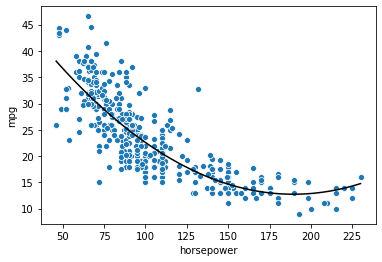

In [60]:
# v. Make a regression plot the response and the predictor.
#sns.lmplot(x="horsepower", y="mpg", data=df, order=2)

fmin, fmax = sub.horsepower.min(), sub.horsepower.max()
coefs = np.polyfit(sub.horsepower, sub.mpg, 2)
#print(coefs)
sns.scatterplot(sub.horsepower, sub.mpg)
xfit = np.linspace(fmin, fmax, 100)
yfit = np.polyval(coefs, xfit)
sns.lineplot(xfit, yfit, color="black")

# 4. Auto Multiple Regression

Perform a multiple linear regression with `mpg` as the response and all other variables except name in `auto` as the predictors. Comment on the output:

i. Is there a relationship between the predictors and the response?

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?

v. Is there heteroscedasticity in the fit?

In [50]:
sub = df.dropna()
y = sub.mpg
x = sub.drop(columns=['mpg', 'name'])

#est = sm.OLS(y, x).fit(cov_type='HC2')
est = sm.OLS(y, sm.add_constant(x)).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.5
Date:                Tue, 19 Jan 2021   Prob (F-statistic):          1.98e-139
Time:                        21:35:42   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:                  HC2                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.697     -3.666      0.000     -26.425      -8.012
cylinders       -0.4934      0.311     -1.586      0.113      -1.103       0.116
displacement     0.0199      0.008      2.401      0.016       0.004       0.036
horsepower      -0.0170      0.014     -1.208      0.227      -0.044       0.011
weight          -0.0065      0.001     -8.304      0.000      -0.008      -0.005
acceleration     0.0806      0.128      0.630      0.529      -0.170       0.331
year             0.7508      0.049     15.196      0.000       0.654       0.848
origin           1.4261      0.275      5.187      0.000       0.887       1.965
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# i. Is there a relationship between the predictors and the response?
    # yes, R-squared = 0.821 and p F-stat < 0.05

# ii. Which predictors appear to have a statistically significant relationship to the response?
    # most, except for acceleration, hp , cylinders (p value > 0.05)

# iii. What does the coefficient for the year variable suggest?
    # each year there's a gain in mpg by 0.75

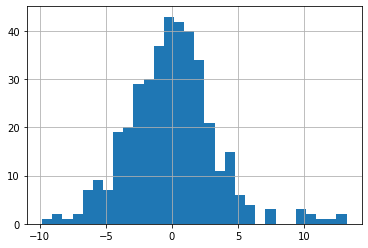

In [49]:
# iv. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?
    # there's a few large outliers (+25% off) because the sample seams biased toward muscle cars

est.resid.hist(bins=30)

In [ ]:
# v. Is there heteroscedasticity in the fit?
    # yes, because the Durbin-Watson value should be 2
    # but I used a Robust Standard Errors (HC2) to handle that

# 5. Car Seats

This question should be answered using the Carseats data set

1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

2. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?

4. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.

6. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [63]:
df = pd.read_csv('data/carseats.csv')
#df = df.join(pd.get_dummies(df.ShelveLoc, drop_first=True, prefix='ShelveLoc'))
#df = df.drop(columns=['ShelveLoc'])
df.Urban = df.Urban.replace('Yes', 1).replace('No', 0)
df.US = df.US.replace('Yes', 1).replace('No', 0)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [64]:
# 1. Fit a multiple regression model to predict Sales using Price, Urban, and US.

y = df.Sales
x = df[['Price','Urban','US']]

#est = sm.OLS(y, x).fit(cov_type='HC2')
est = sm.OLS(y, sm.add_constant(x)).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     43.09
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           4.04e-24
Time:                        21:57:26   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.641     20.333      0.000      11.786      14.301
Price         -0.0545      0.005    -10.515      0.000      -0.065      -0.044
Urban         -0.0219      0.258     -0.085      0.932      -0.527       0.484
US             1.2006      0.246      4.878      0.000       0.718       1.683
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [ ]:
# 2. Provide an interpretation of each coefficient in the model.

    # Price: each time the Price rise by 1 the sales goes down by 0.0545
    # The Urban stores feature is not significant
    # Stores in US get 1.2 more in sales

# 3. For which of the predictors can you reject the null hypothesis H0 : βj = 0?
    # none, p value < 0.5

In [65]:
# 4. Fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.
y = df.Sales
x = df[['Price','US']]

#est = sm.OLS(y, x).fit(cov_type='HC2')
est = sm.OLS(y, sm.add_constant(x)).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     64.66
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           4.90e-25
Time:                        21:57:30   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.622     20.944      0.000      11.811      14.250
Price         -0.0545      0.005    -10.543      0.000      -0.065      -0.044
US             1.1996      0.247      4.863      0.000       0.716       1.683
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [ ]:
# 5. How well do the models in 1 and 4 fit the data? Explain which statistics show the difference.
    # R-squared and Log-likelyhood are unchanged but F-stat and AIC/BIC are better

# 6. Using the model from (5), obtain 95 % confidence intervals for the coefficient(s).
    #                coef	std err	    z	P>|z|	[0.025	0.975]
    # Price	        -0.0545	0.005	-10.543	0.000	-0.065	-0.044
    # US	        1.1996	0.247	4.863	0.000	0.716	1.68

In [60]:
est.conf_int()

,0,1
const,11.811364,14.250221
Price,-0.064605,-0.044350
US,0.716136,1.683150
